# **Data Driven Crop Analysis and Prediction**

Import the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

C:\Users\P.BHANU PRANASWI SAI\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Load the Dataset using `pd.read_csv`

In [2]:
df = pd.read_csv('../app/data/Crop_recommendation.csv')
df

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

`df.info()` provides concise summary information about a DataFrame, including the index dtype, column data types, non-null values, and memory usage.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Check whether there are any null values

In [4]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

`df['label'].value_counts()` returns the count of unique values in the 'label' column of the DataFrame `df`, showing how many times each unique value appears in the column.

In [5]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

`df.describe()` generates descriptive statistics that summarize the central tendency, dispersion, and shape of the numerical features in the DataFrame `df`, including count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values.

In [6]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

`df.nunique()` returns the number of unique values for each column in the DataFrame `df`.

In [7]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

# EXPLORATORY DATA ANALYSIS

**HISTOGRAM**

Frequency plot of all the attributes in the data frame as a whole

<Axes: ylabel='Frequency'>

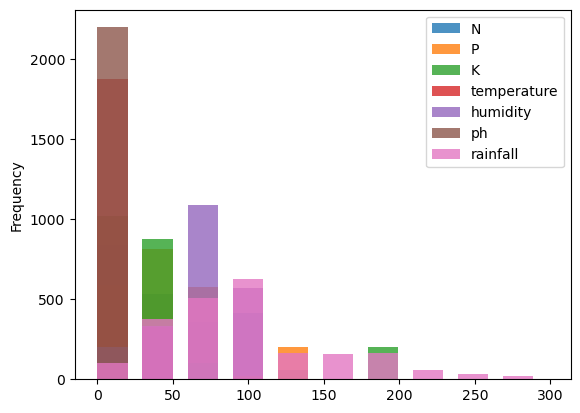

In [8]:
df.plot(kind = 'hist', width = 20, alpha = 0.8)

Frequency plots of all the attributes in the data frame

Text(0, 0.5, 'Frequency')

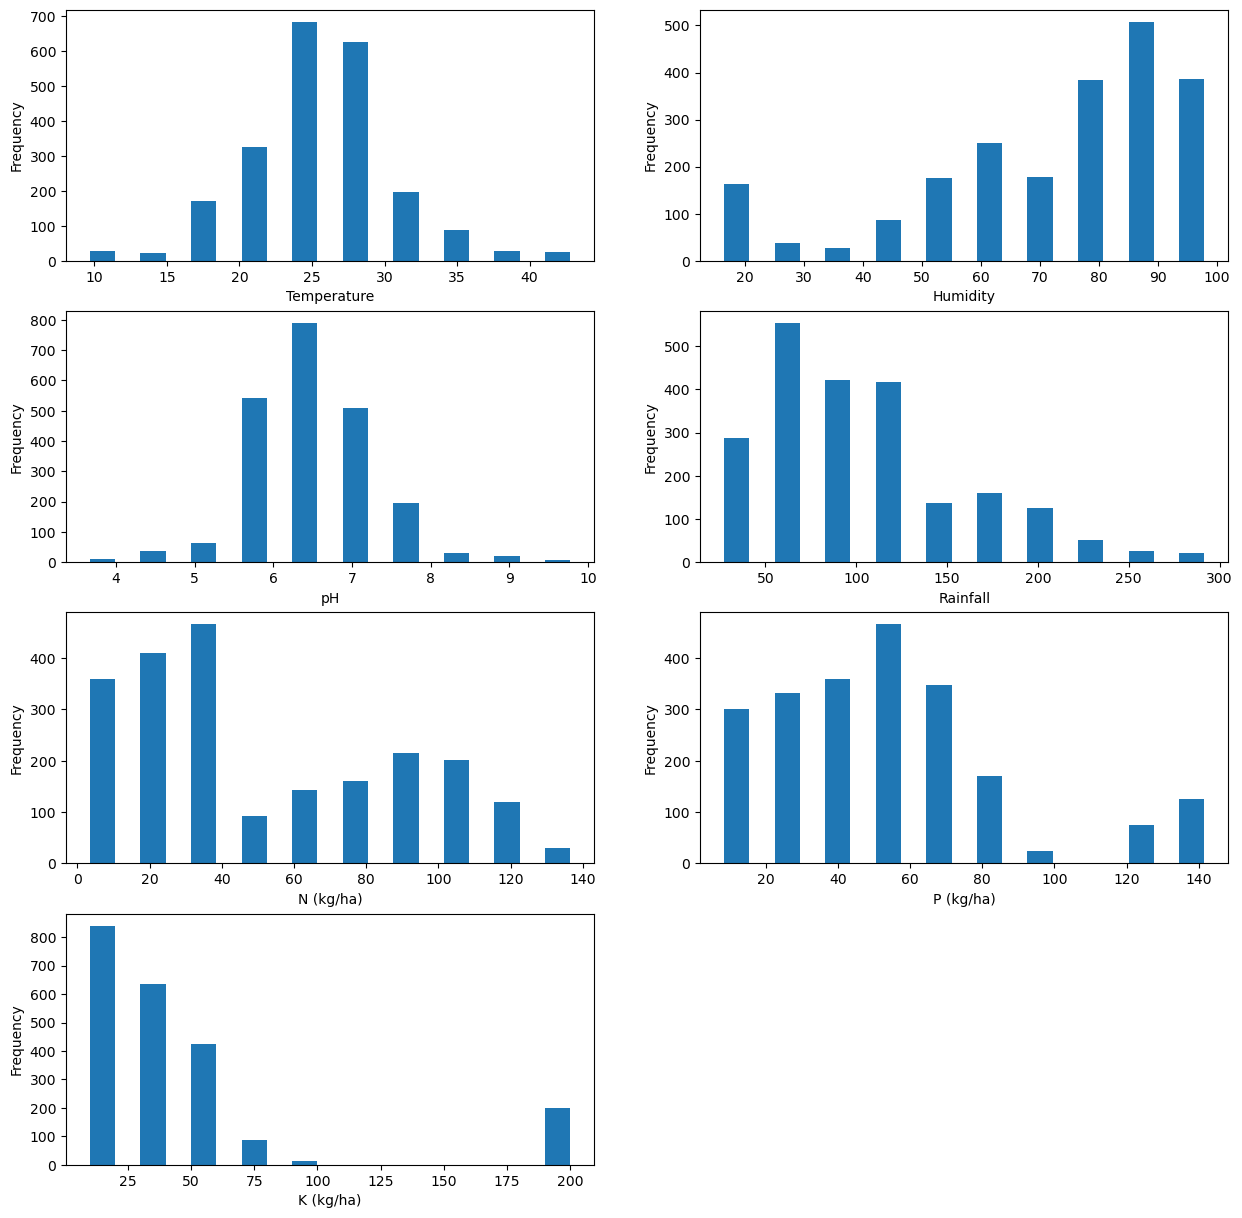

In [9]:
#Frequency of each attribute
fig, ax = plt.subplots(figsize = (15, 15))
plt.subplot(4, 2, 1)
df['temperature'].plot(kind = 'hist', rwidth = 0.5)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.subplot(4, 2, 2)
df['humidity'].plot(kind = 'hist', rwidth = 0.5)
plt.xlabel('Humidity')
plt.ylabel('Frequency')

plt.subplot(4, 2, 3)
df['ph'].plot(kind = 'hist', rwidth = 0.5)
plt.xlabel('pH')
plt.ylabel('Frequency')

plt.subplot(4, 2, 4)
df['rainfall'].plot(kind = 'hist', rwidth = 0.5)
plt.xlabel('Rainfall')
plt.ylabel('Frequency')

plt.subplot(4, 2, 5)
df['N'].plot(kind = 'hist', rwidth = 0.5)
plt.xlabel('N (kg/ha)')
plt.ylabel('Frequency')

plt.subplot(4, 2, 6)
df['P'].plot(kind = 'hist', rwidth = 0.5)
plt.xlabel('P (kg/ha)')
plt.ylabel('Frequency')

plt.subplot(4, 2, 7)
df['K'].plot(kind = 'hist', rwidth = 0.5)
plt.xlabel('K (kg/ha)')
plt.ylabel('Frequency')


Generates a pie chart illustrating the average Nitrogen, Phosphorous, and Potassium (NPK) content in the dataset `df`, with respective labels and colors representing each nutrient. The chart aids in visualizing the relative proportions of these nutrients.

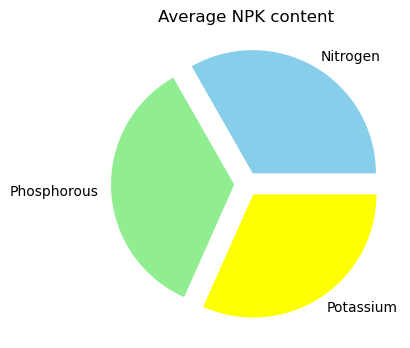

In [10]:
NPKvals = ['Nitrogen', 'Phosphorous', 'Potassium']
sizes = [df['N'].mean(), df['P'].mean(), df['K'].mean()]

fig, ax = plt.subplots(figsize = (4, 4))
ax.pie(sizes, labels = NPKvals, colors = ['skyblue', 'lightgreen', 'yellow'], explode = [0.1, 0.1, 0.1])
ax.set_title('Average NPK content')
plt.show()

**COUNT PLOT**


utilizes seaborn to create a countplot, visualizing the frequency of each unique value in the 'label' column of the DataFrame df.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

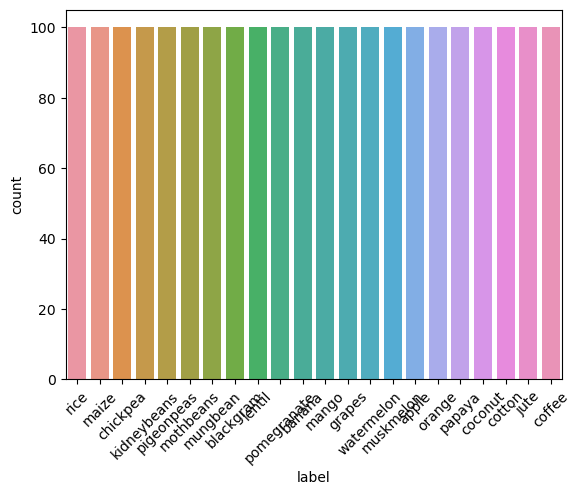

In [11]:
sns.countplot(x = df['label'])
plt.xticks(rotation = 45)

**BAR PLOT**

Iterates through numeric columns (float64 and int64 types) in the DataFrame `df`, creating individual bar plots for each column against the `label`. It visualizes the relationship between each numerical feature and the categorical `label` column. 

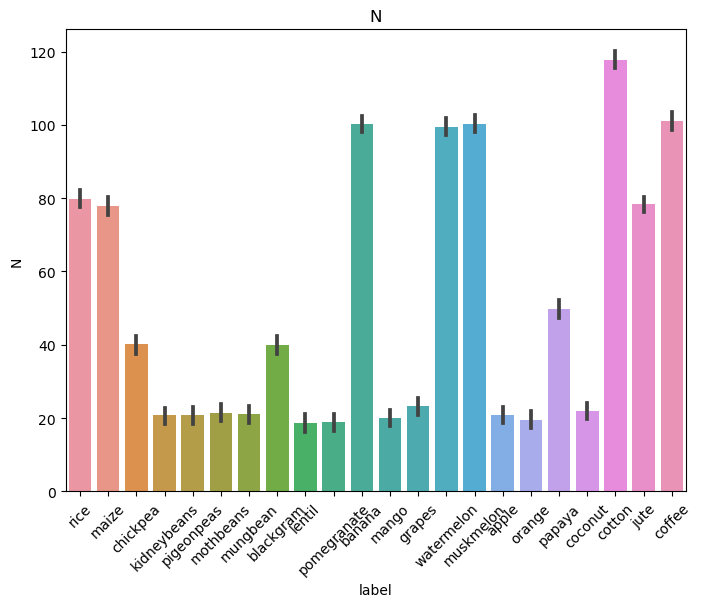

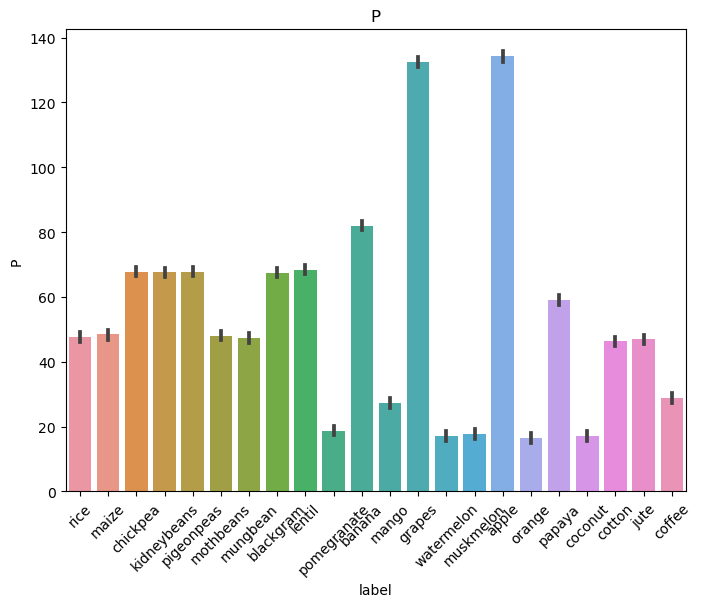

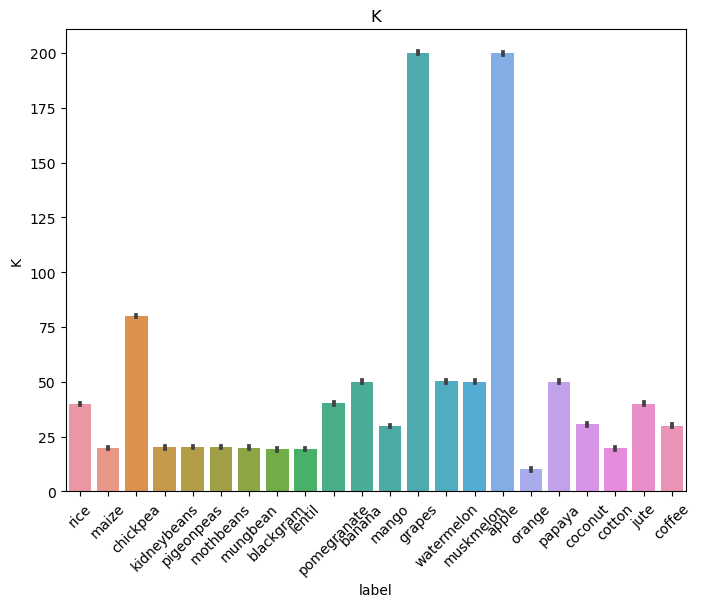

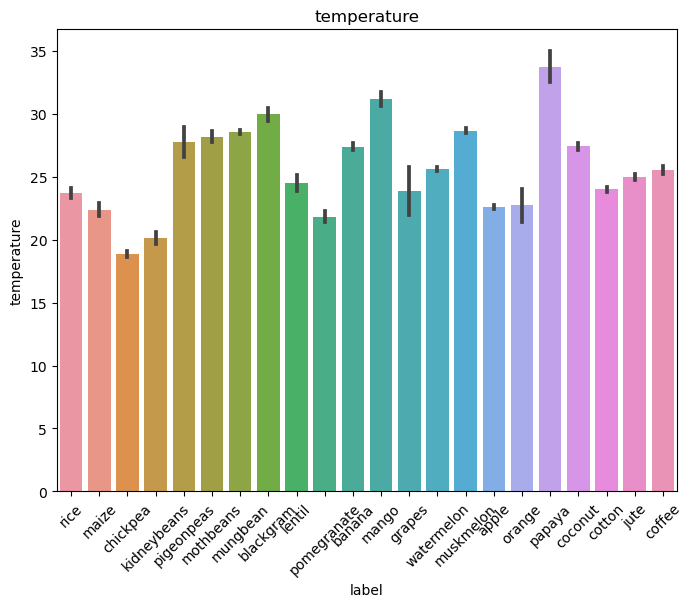

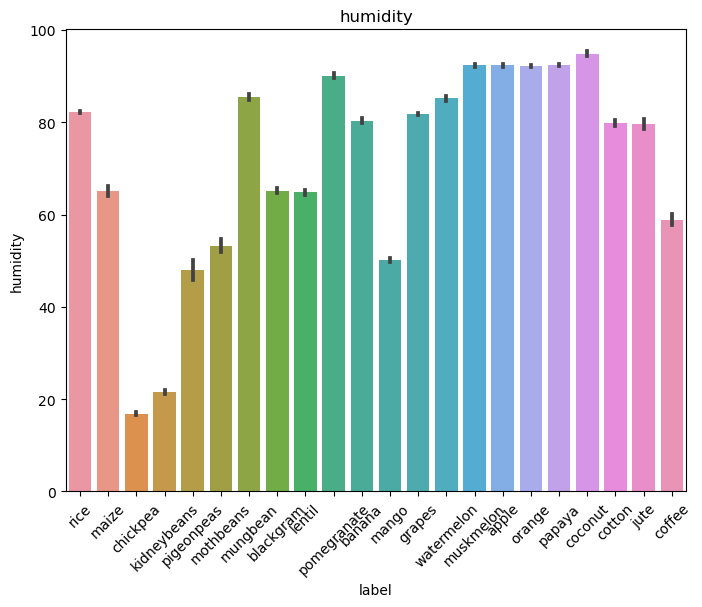

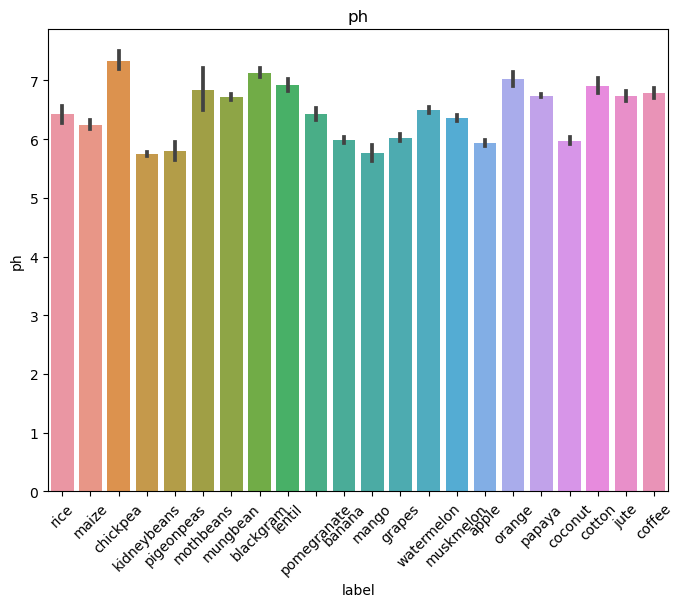

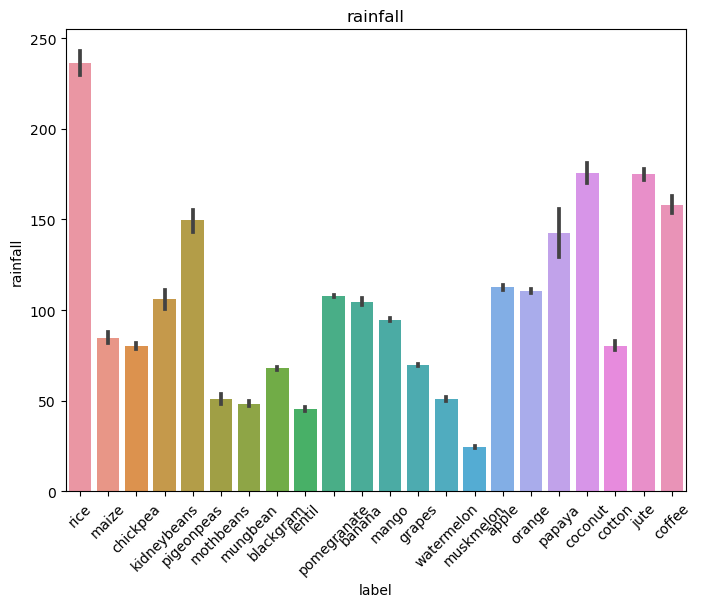

In [12]:
cols = df.select_dtypes(include = ['float64', 'int64']).columns

for col in cols:
    plt.figure(figsize = (8, 6))
    plt.title(col)
    sns.barplot(x = 'label', y = col, data = df)
    plt.xticks(rotation = 45)

**BOX PLOT - FOR DETECTING THE OUTLIERS**

Conducts bivariate analysis for each numeric feature against the 'label' column in the DataFrame `df`. It creates boxplots to visualize the distribution of each feature across different categories of the 'label'. The `palette='bright'` parameter sets the color palette for the boxplots, enhancing visualization. The `plt.xticks(rotation=45)` command rotates the x-axis labels for improved readability.

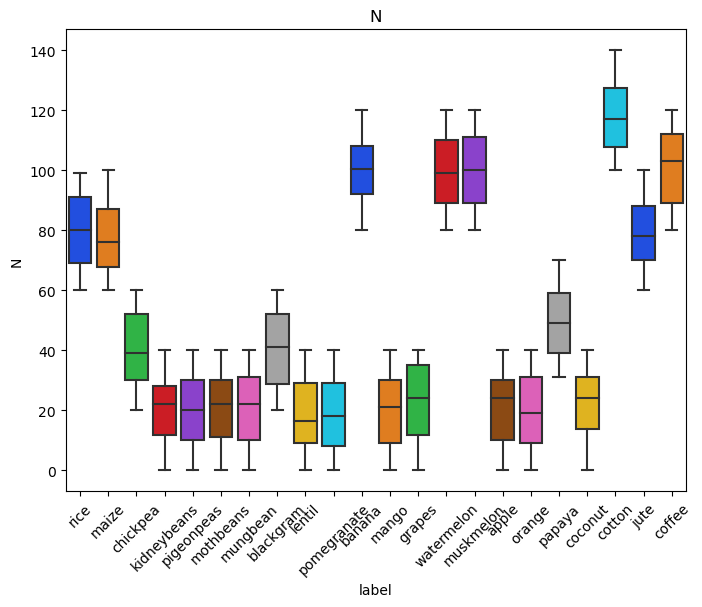

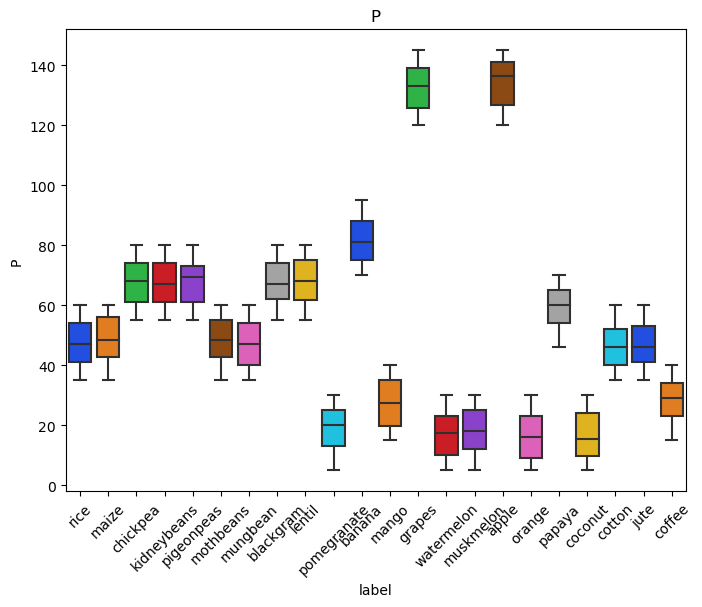

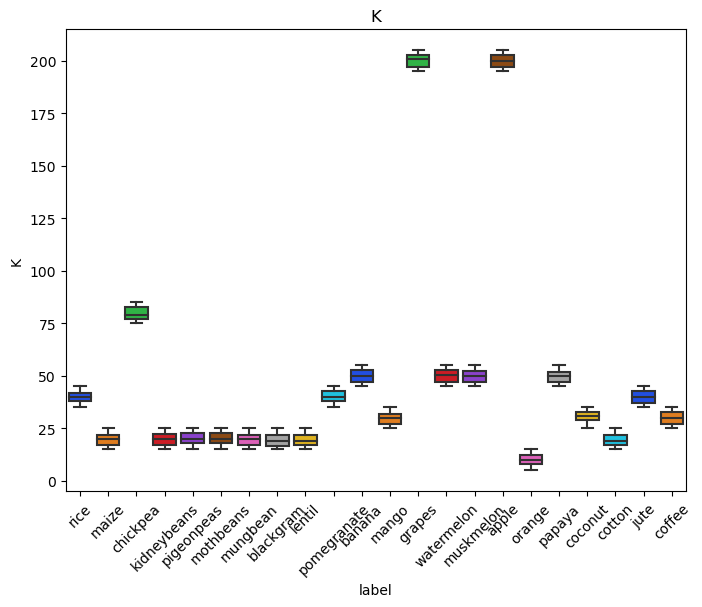

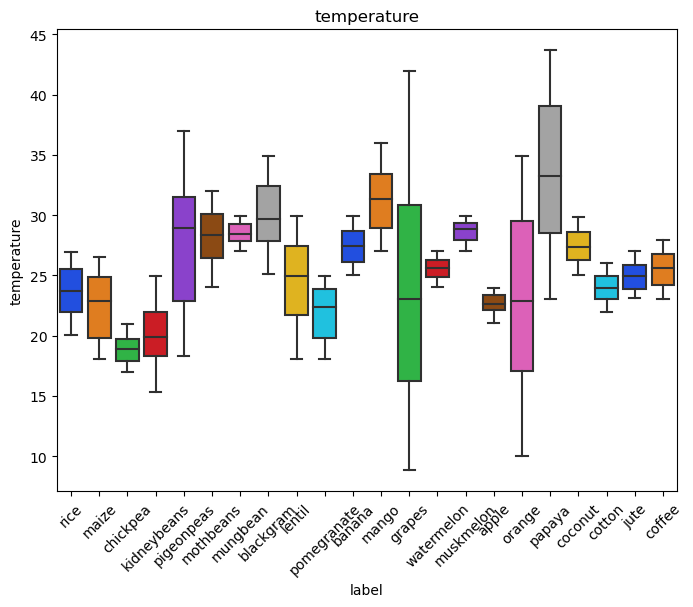

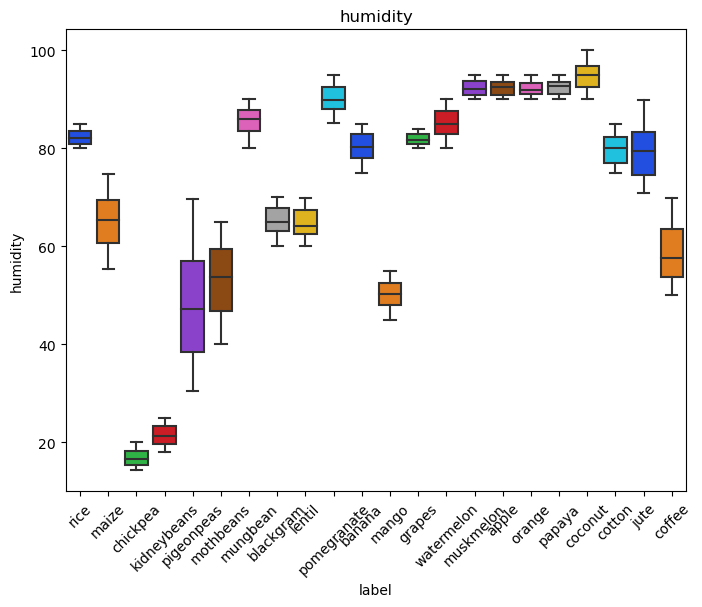

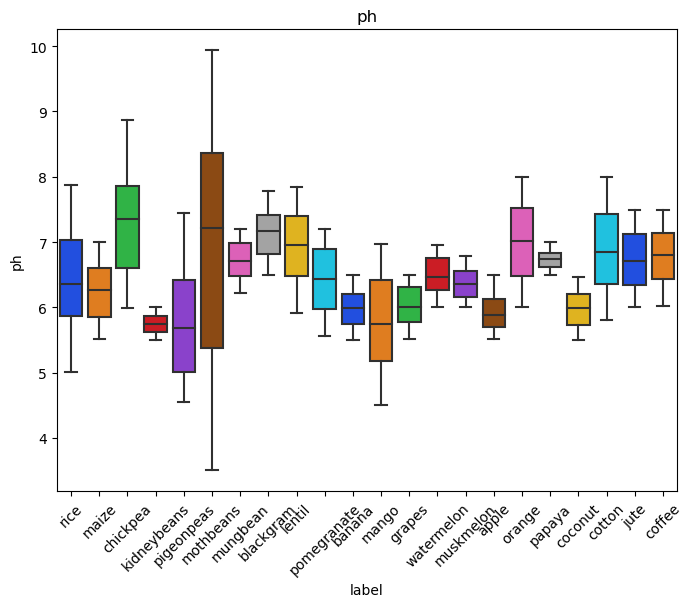

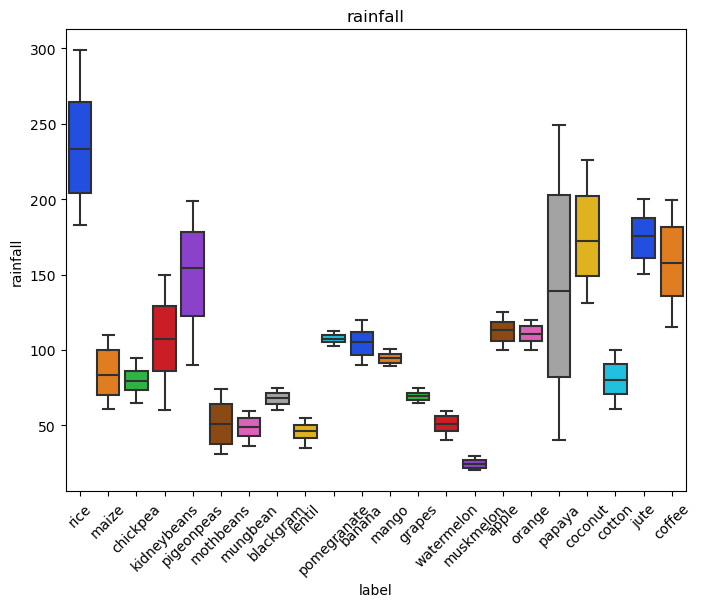

In [13]:
# Bivariate analysis for each feature against the label
for col in cols:
    plt.figure(figsize = (8, 6))
    plt.title(col)
    sns.boxplot(x = 'label', y = col, data = df, palette = 'bright')
    plt.xticks(rotation = 45)

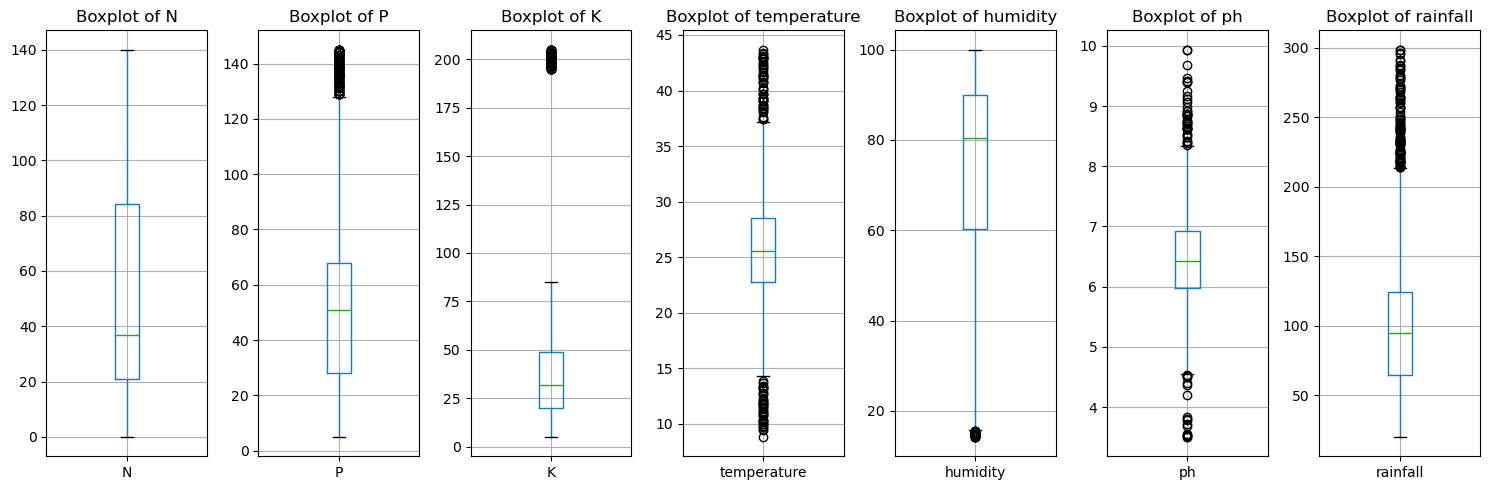

In [14]:
numerical_cols = df.select_dtypes(include = ['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

**KDE-PLOT**

Generates Kernel Density Estimate (KDE) plots for each numerical feature in the DataFrame `df`, providing a visual representation of their probability density distributions. Each subplot displays the KDE plot for a specific numerical column, allowing for comparisons of their distributions.

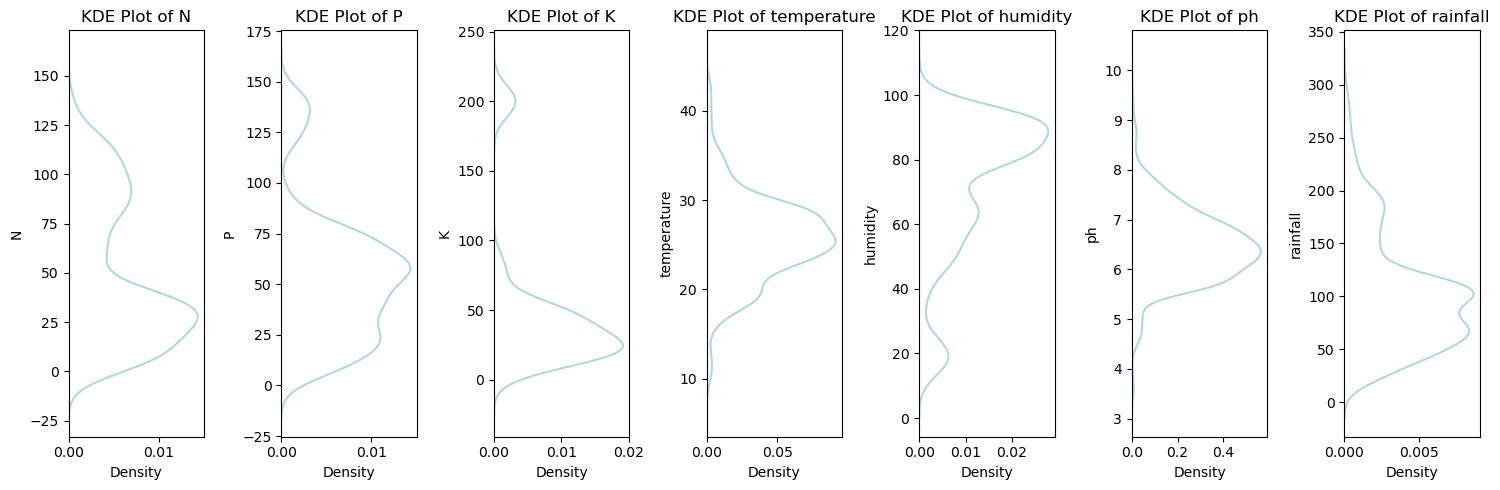

In [15]:
numerical_cols = df.select_dtypes(include = ['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    sns.kdeplot(y=col, data=df, ax=axes[i], color='lightblue')
    axes[i].set_title(f'KDE Plot of {col}')
plt.tight_layout()
plt.show()

**VIOLIN PLOT**

Generates violin plots for each numerical feature in the DataFrame `df`, illustrating the distribution of data along with its probability density. Each subplot displays a violin plot for a specific numerical column, providing insights into their distributions and variations.

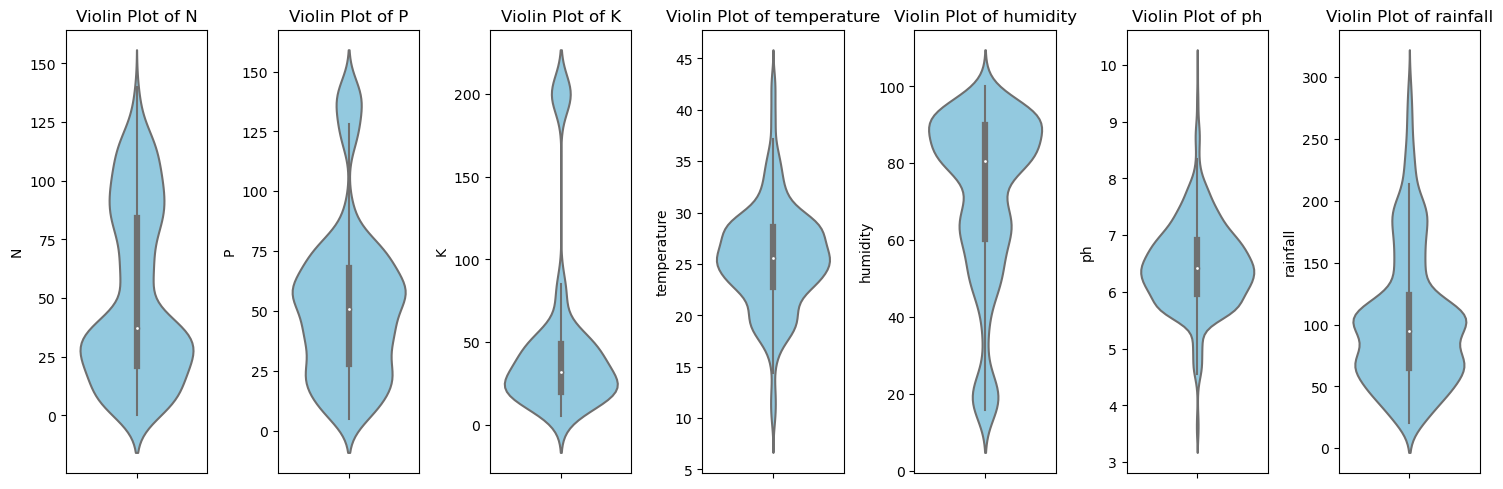

In [16]:
numerical_cols = df.select_dtypes(include = ['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    sns.violinplot(y=col, data=df, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Violin Plot of {col}')
plt.tight_layout()
plt.show()

**HANDLING OUTLIERS**

`detect_outliers` is a function to detect and count outliers in a column, where `outliers_info = {}` is the Dictionary to store outlier information and outliers are handled by finding the lower and upper bounds, now we will be placing the outliers in the Inter Quartile Range so as to handle them


In [17]:
def detect_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

outliers_info = {}

cols = df.select_dtypes(include = ['float64', 'int64']).columns
for col in cols:
    outliers = detect_outliers(df[col])
    outliers_info[col] = {
        'count_before': len(outliers),
        'values_before': outliers.values.tolist(),
    }
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = df[col].apply(lambda x: min(upper_bound, max(lower_bound, x)))

    outliers_handled = detect_outliers(df[col])
    outliers_info[col]['count_after'] = len(outliers_handled)
    outliers_info[col]['values_after'] = outliers_handled.values.tolist()

for col, info in outliers_info.items():
    print(f"Column: {col}")
    print(f"Outliers Count Before Handling: {info['count_before']}")
    print(f"Outliers Values Before Handling: {info['values_before']}")
    print(f"Outliers Count After Handling: {info['count_after']}")
    print(f"Outliers Values After Handling: {info['values_after']}")
    print()

Column: N
Outliers Count Before Handling: 0
Outliers Values Before Handling: []
Outliers Count After Handling: 0
Outliers Values After Handling: []

Column: P
Outliers Count Before Handling: 138
Outliers Values Before Handling: [130, 144, 131, 140, 134, 130, 145, 139, 141, 138, 144, 136, 136, 145, 132, 133, 140, 132, 142, 135, 139, 141, 142, 129, 134, 138, 131, 132, 137, 136, 134, 139, 138, 142, 133, 139, 134, 140, 139, 136, 139, 133, 130, 135, 140, 132, 132, 142, 140, 133, 135, 145, 136, 129, 130, 129, 135, 132, 140, 145, 139, 144, 141, 138, 138, 143, 142, 134, 144, 129, 137, 139, 144, 139, 133, 143, 140, 137, 144, 143, 140, 144, 141, 144, 143, 137, 144, 143, 141, 142, 138, 137, 135, 144, 133, 130, 143, 143, 139, 136, 131, 140, 138, 145, 139, 136, 138, 136, 134, 143, 145, 141, 136, 136, 141, 129, 138, 137, 132, 139, 143, 144, 143, 135, 130, 142, 129, 135, 145, 131, 140, 138, 140, 145, 132, 137, 144, 140]
Outliers Count After Handling: 0
Outliers Values After Handling: []

Column: K
Ou

**HIST PLOT**

Univariate analysis of each feature using histplot

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

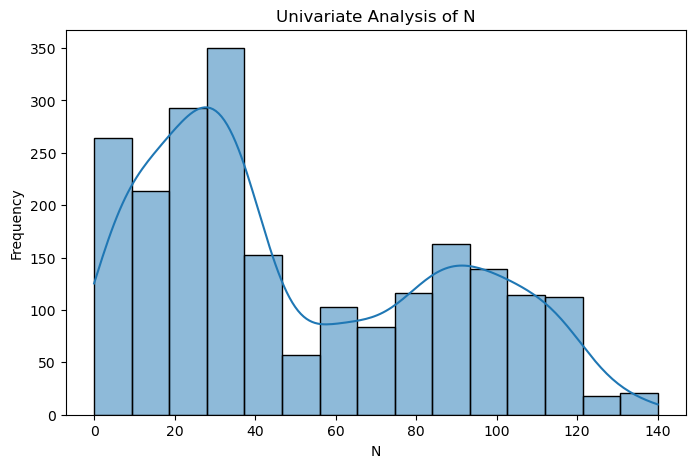

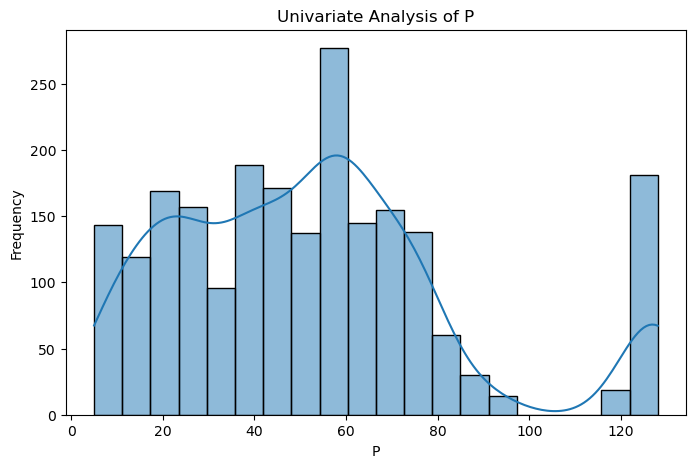

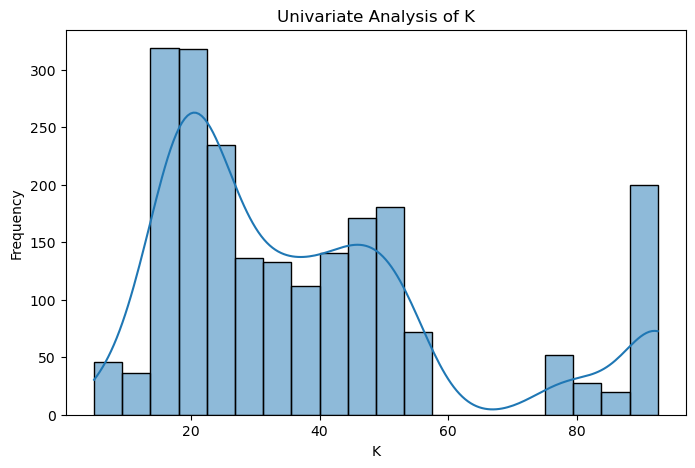

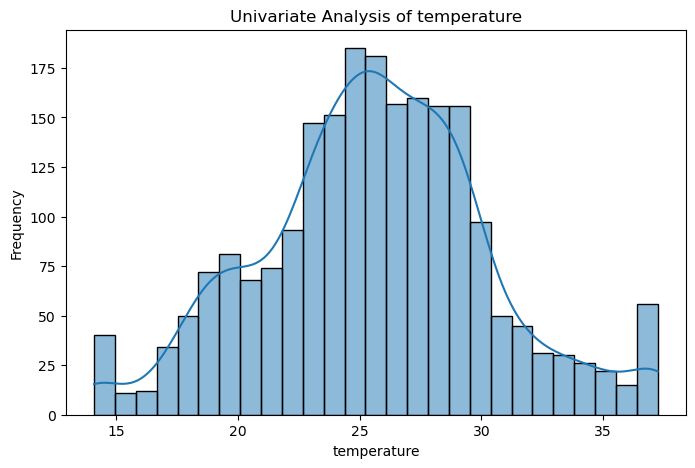

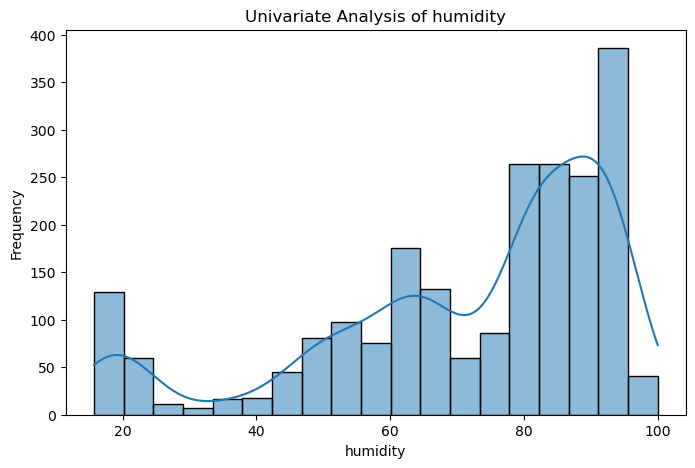

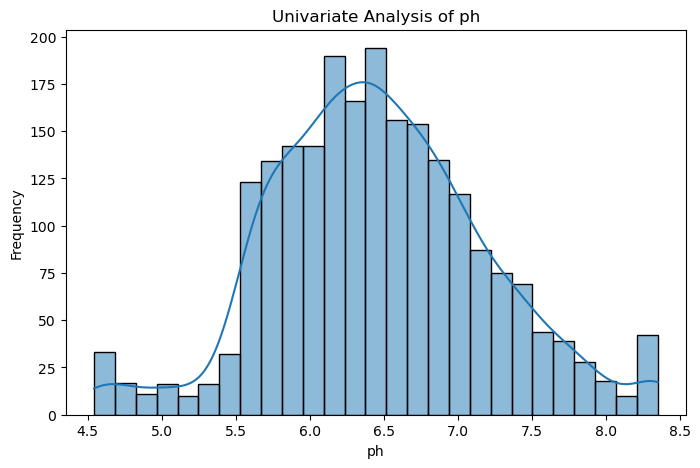

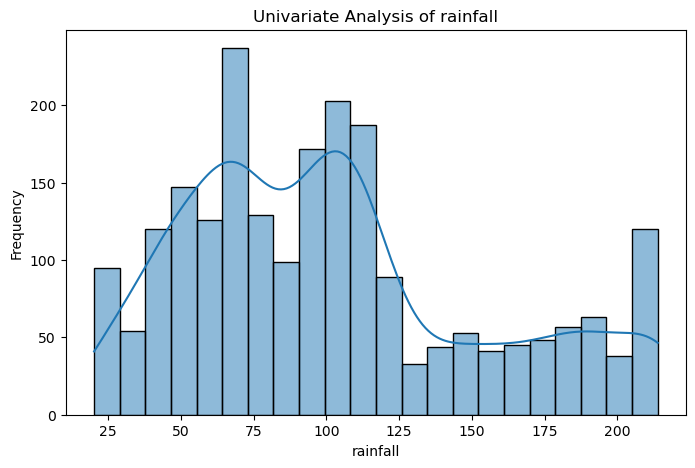

In [19]:
for column in df.columns:
    if column != 'label':
        plt.figure(figsize=(8, 5))
        sns.histplot(df[column], kde=True)
        plt.title(f'Univariate Analysis of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

**DISPLOT**

<Figure size 800x600 with 0 Axes>

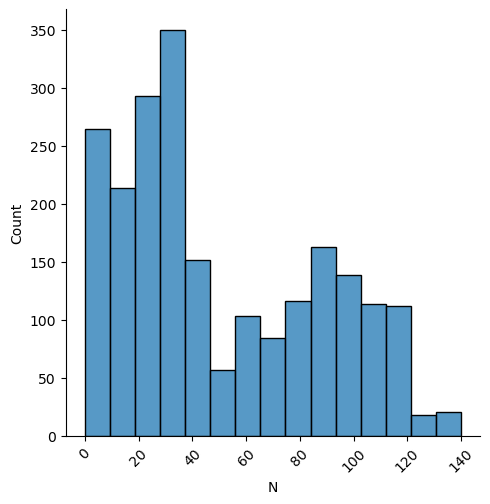

<Figure size 800x600 with 0 Axes>

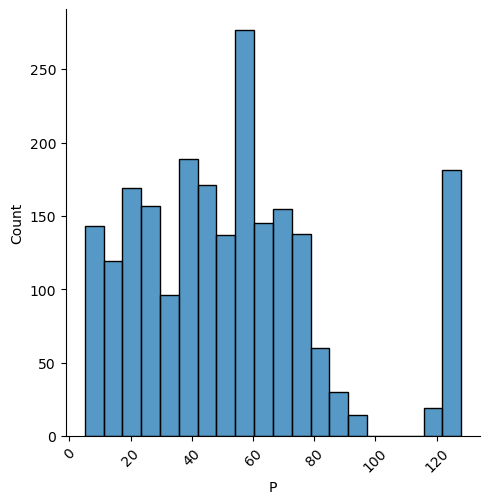

<Figure size 800x600 with 0 Axes>

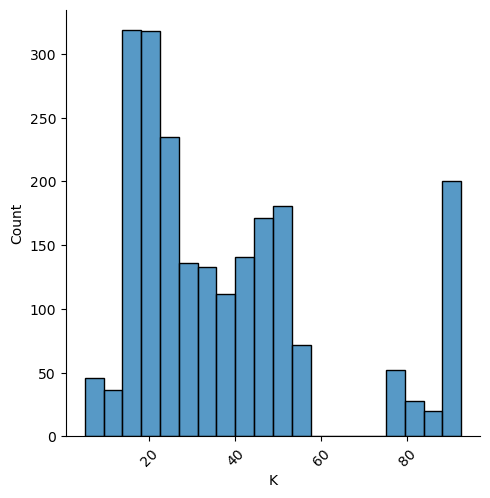

<Figure size 800x600 with 0 Axes>

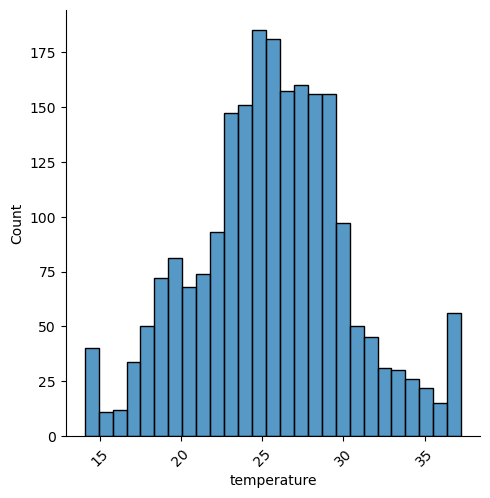

<Figure size 800x600 with 0 Axes>

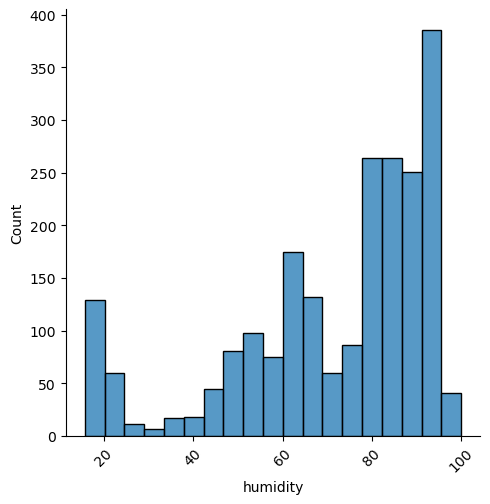

<Figure size 800x600 with 0 Axes>

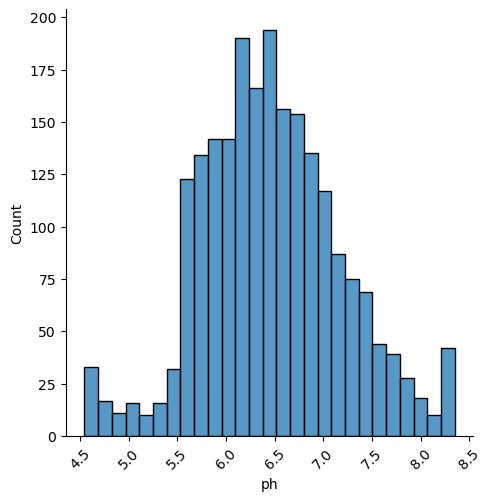

<Figure size 800x600 with 0 Axes>

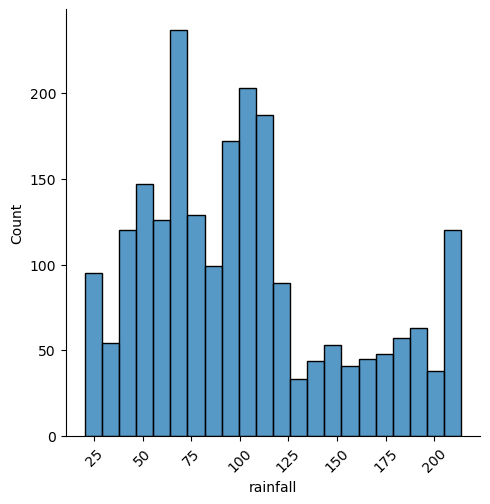

In [20]:
for col in cols:
    plt.figure(figsize = (8, 6))
    sns.displot(data = df, x = col)
    plt.xticks(rotation = 45)  

**BIVARIATE ANALYSIS**

**PAIR PLOT**

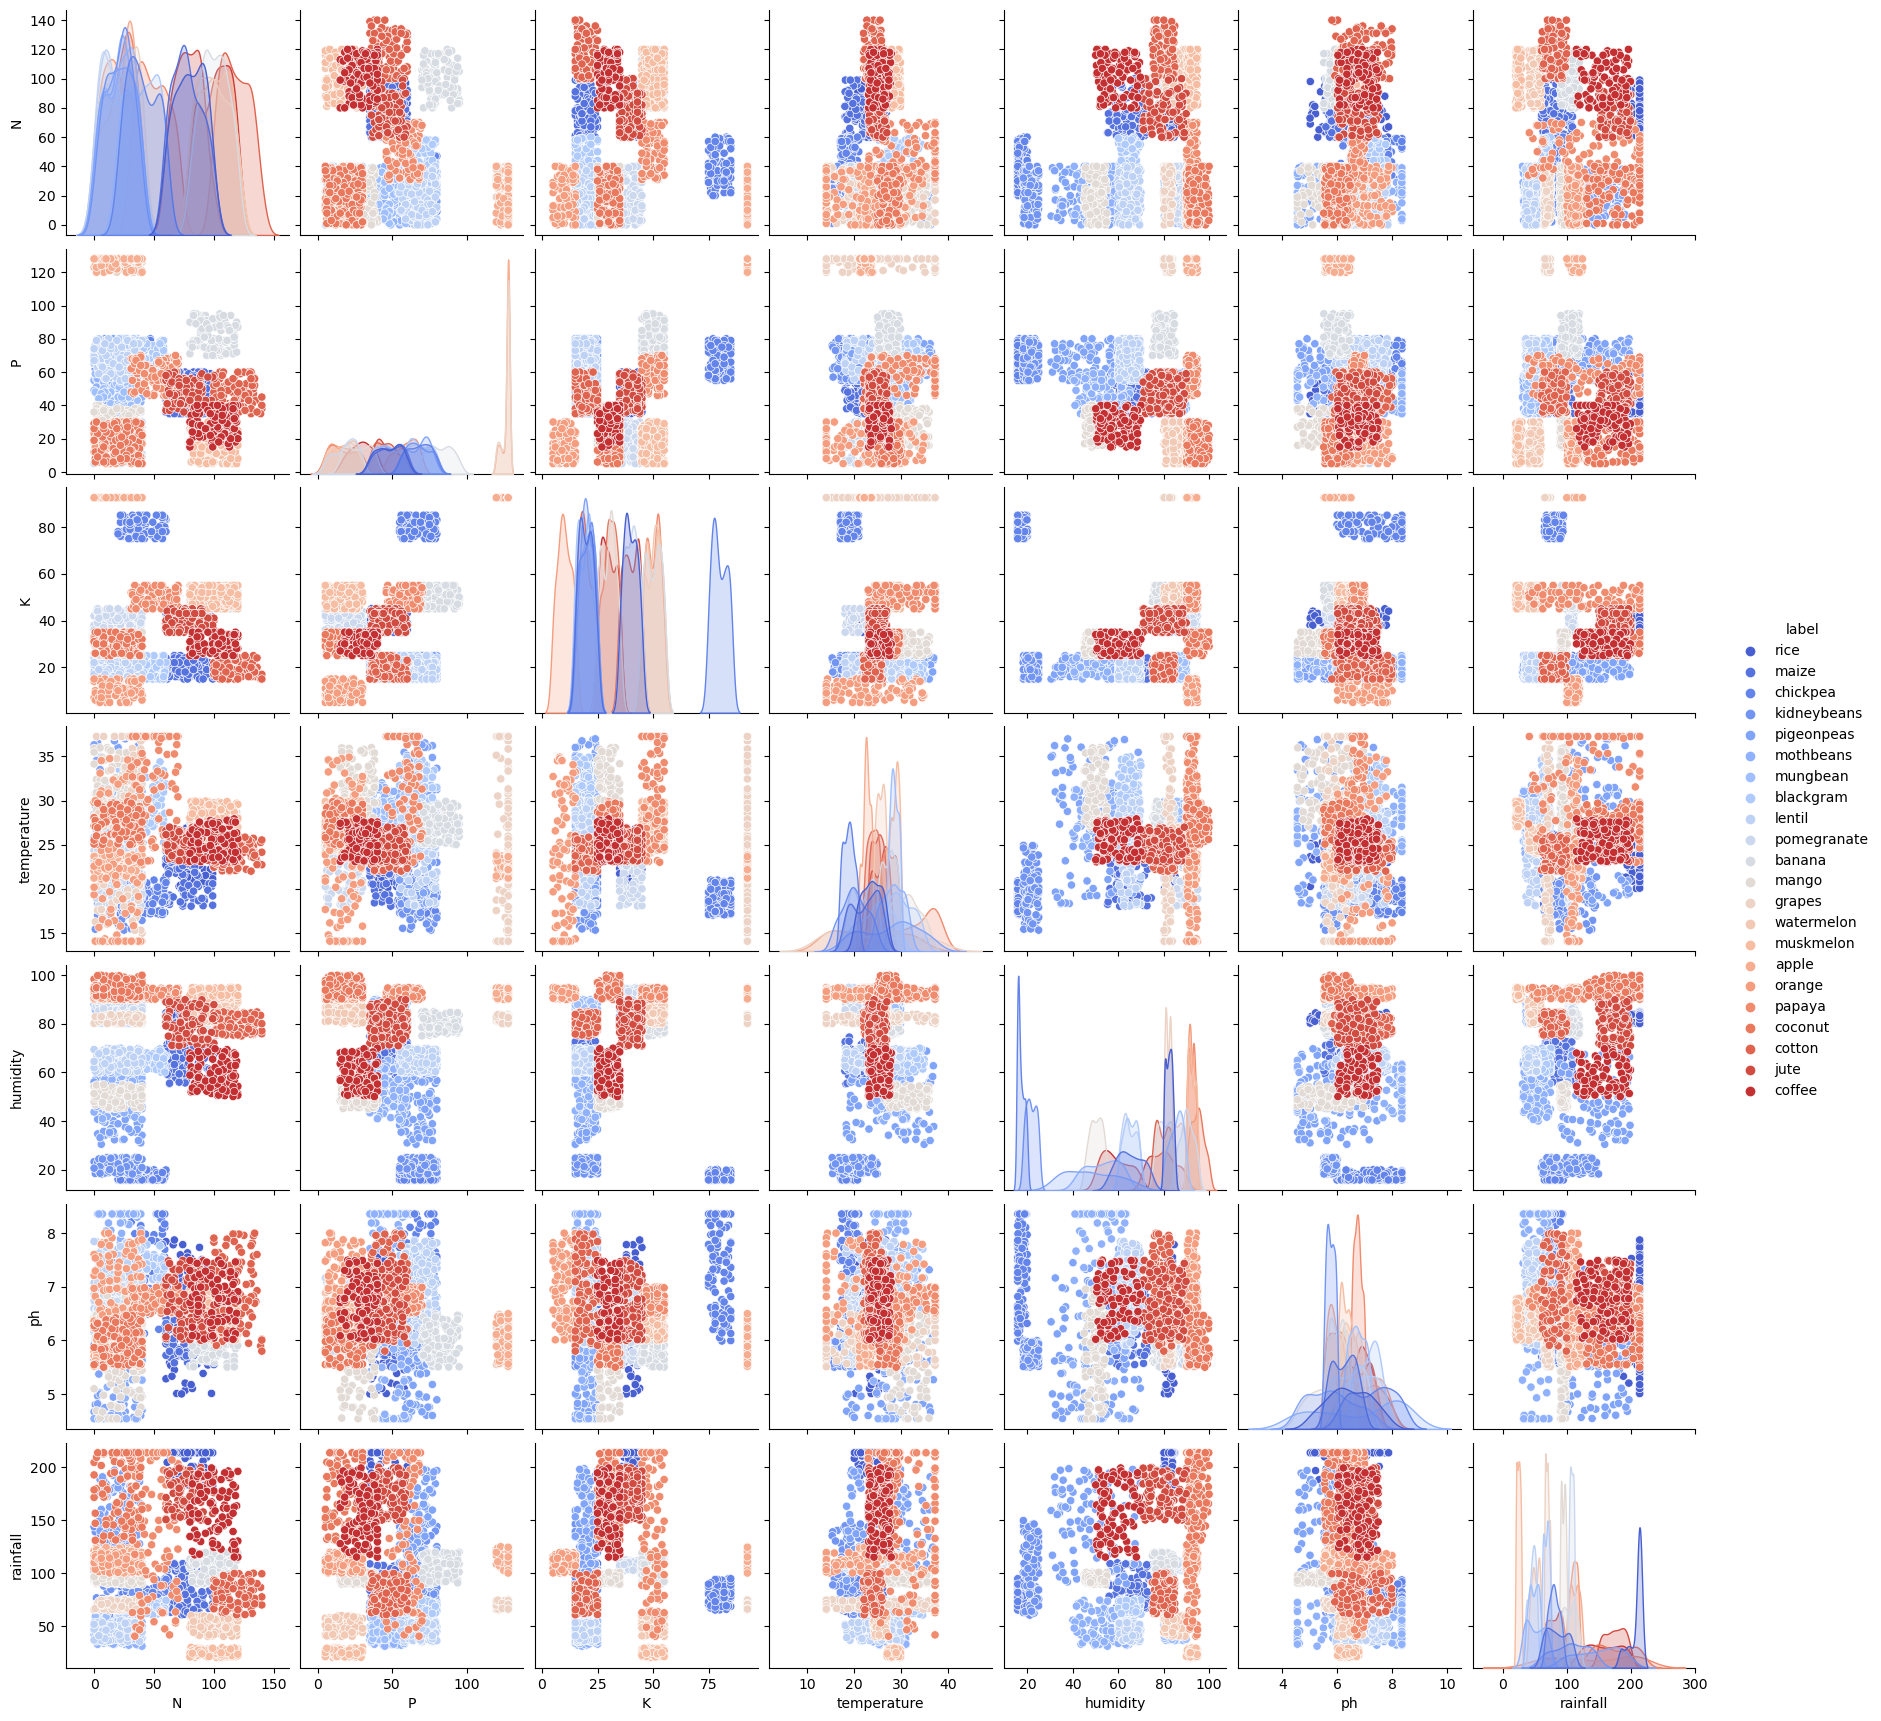

In [21]:
sns.pairplot(df, hue='label', diag_kind = 'kde', palette = 'coolwarm')
plt.show()

**SCATTER PLOT**

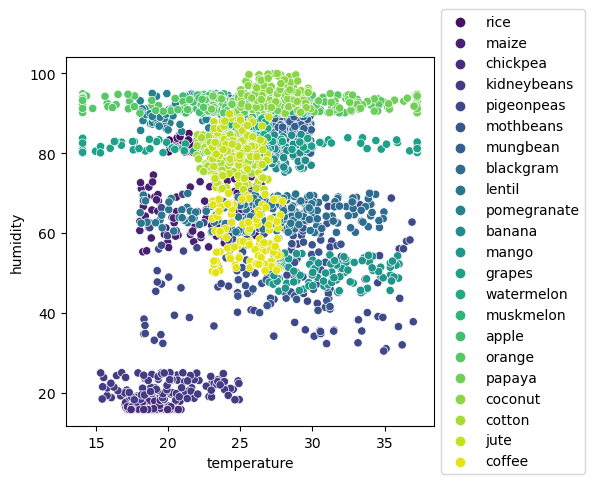

In [22]:
sns.scatterplot(x='temperature', y='humidity', hue='label', data=df, palette='viridis')
plt.subplots_adjust(right=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

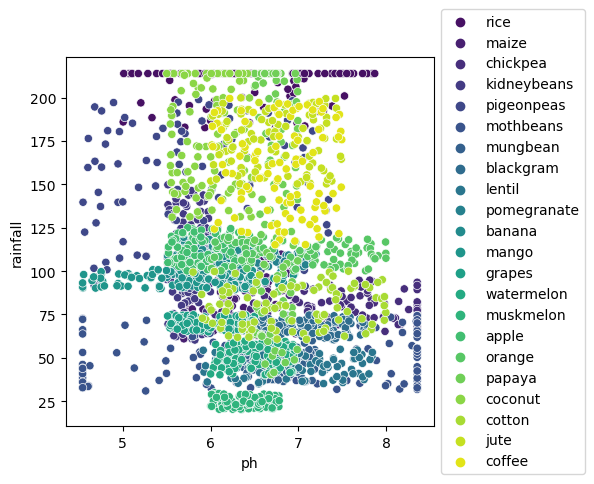

In [23]:
sns.scatterplot(x='ph', y='rainfall', hue='label', data=df, palette='viridis')
plt.subplots_adjust(right=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**CORRELATION MATRIX**

Exclude target variable from correlation analysis and plot using `sns.heatmap()`

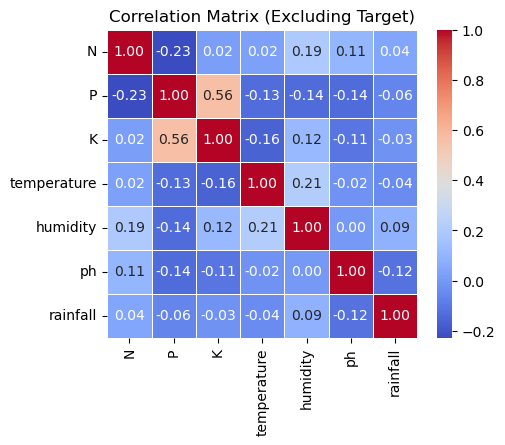

In [24]:
correlation_matrix = df.drop('label', axis=1).corr()
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (Excluding Target)')
plt.show()

**PROBPLOT**

probability plot assesses the distributional fit of continuous data against a theoretical distribution.

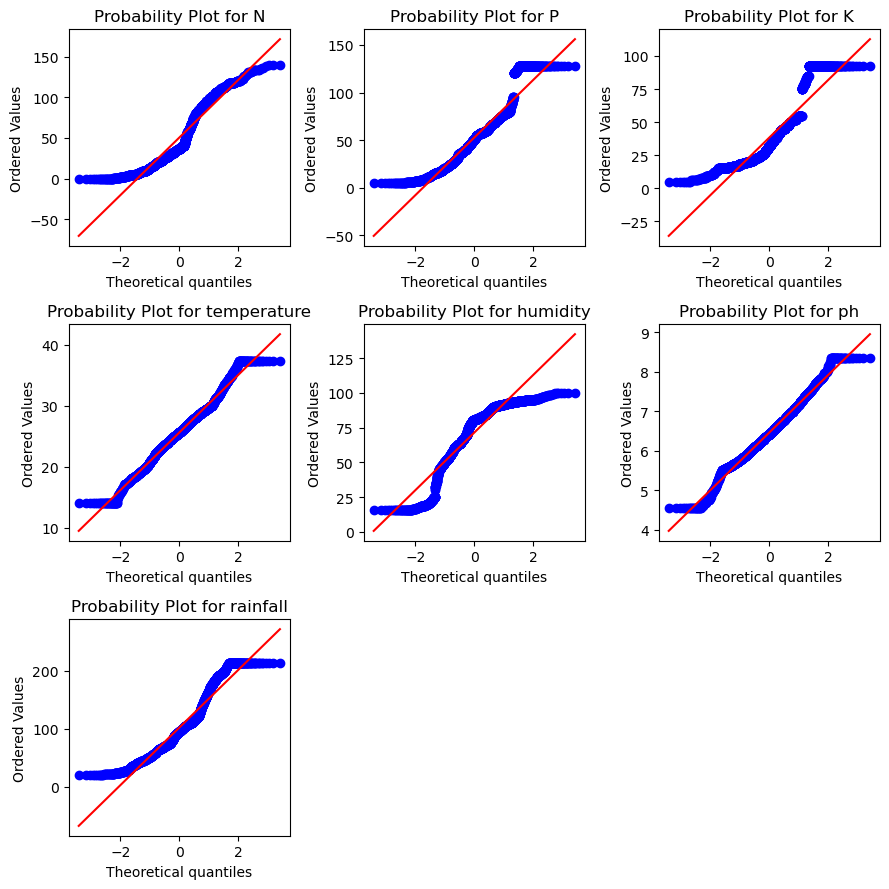

In [25]:
import scipy.stats as stats

plt.figure(figsize=(9, 9))
i = 1
for col in df.columns[:-1]:
    plt.subplot(3, 3, i)
    stats.probplot(df[col], dist='norm', plot=plt)
    plt.title(f'Probability Plot for {col}')
    i += 1

plt.tight_layout()
plt.show()


**REL PLOT**

Generates a relational plot (scatter plot) to visualize the relationship between 'rainfall' and 'ph' attributes, with data points colored and sized by 'label', using a cubehelix color palette and linear scales for axes.

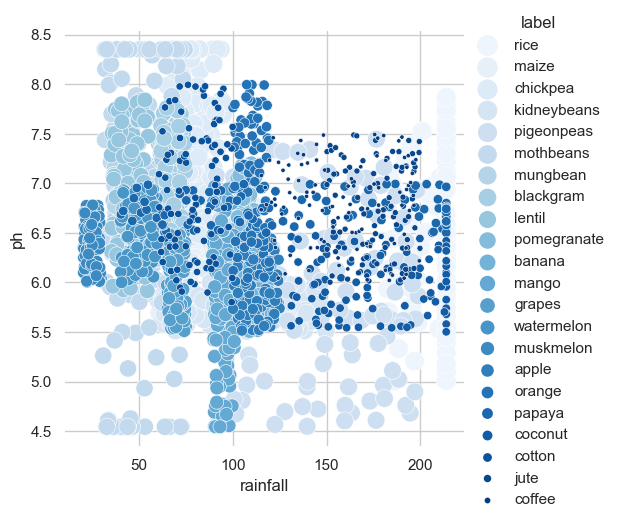

In [26]:
sns.set_theme(style="whitegrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="rainfall", y="ph",
    hue="label", size="label",
    palette="Blues", sizes=(10, 200),
)
g.set(xscale="linear", yscale="linear")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

plt.show()

**JOINT PLOT**

Creates a joint plot, displaying the relationship between 'temperature' and 'humidity' attributes from DataFrame 'df', including a regression line and histograms for each variable, with a white grid style.

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

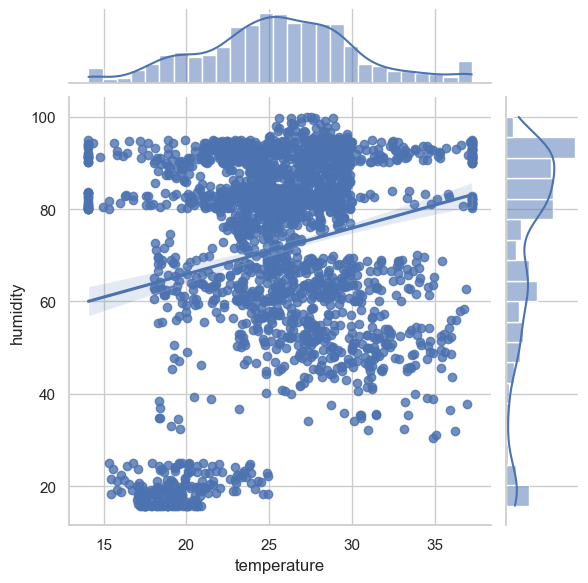

In [28]:
sns.set_theme(style="whitegrid")

sns.jointplot(data=df, x='temperature', y='humidity', kind="reg")
plt.show()


Calculates the mean of each numeric attribute grouped by the 'label' column in the DataFrame `df`, creating a summary table (pivot table) showing the average values for each attribute across different crop labels.

In [29]:
summary = pd.pivot_table(df, index = ['label'], aggfunc = 'mean')
summary

K       N       P   humidity        ph    rainfall  \
label                                                                 
apple        92.50   20.80  126.66  92.333383  5.929663  112.654779   
banana       50.05  100.23   82.01  80.358123  5.983893  104.626980   
blackgram    19.24   40.02   67.47  65.118426  7.133952   67.884151   
chickpea     79.92   40.09   67.79  17.114928  7.295763   80.058977   
coconut      30.59   21.98   16.93  94.844272  5.976562  174.697366   
coffee       29.94  101.20   28.74  58.869846  6.790308  158.066295   
cotton       19.56  117.77   46.24  79.843474  6.912675   80.398043   
grapes       92.50   23.18  126.46  81.875228  6.025937   69.611829   
jute         39.99   78.40   46.86  79.639864  6.732778  174.792798   
kidneybeans  20.05   20.75   67.54  21.605357  5.749411  105.919778   
lentil       19.41   18.77   68.36  64.804785  6.927932   45.680454   
maize        19.79   77.76   48.44  65.092249  6.245190   84.766988   
mango        29.92   20.07   27.18  50.156573  5.766916   94.704515   
mothbeans    20.23   21.44   48.01  53.160418  6.755765   51.198487   
mungbean     19.87   20.99   47.28  85.499975  6.723957   48.403601   
muskmelon    50.08  100.32   17.72  92.342802  6.358805   24.689952   
orange       10.01   19.58   16.55  92.170209  7.016957  110.474969   
papaya       50.04   49.88   59.05  92.403388  6.741442  139.205102   
pigeonpeas   20.29   20.73   67.73  48.061633  5.794175  149.457564   
pomegranate  40.21   18.87   18.75  90.125504  6.429172  107.528442   
rice         39.87   79.89   47.58  82.272822  6.425471  208.094939   
watermelon   50.22   99.42   17.00  85.160375  6.495778   50.786219   

             temperature  
label                     
apple          22.630942  
banana         27.376798  
blackgram      29.973340  
chickpea       18.872847  
coconut        27.409892  
coffee         25.540477  
cotton         23.988958  
grapes         24.084137  
jute           24.958376  
kidneybeans    20.115085  
lentil         24.509052  
maize          22.389204  
mango          31.208770  
mothbeans      28.194920  
mungbean       28.525775  
muskmelon      28.663066  
orange         23.158815  
papaya         32.491130  
pigeonpeas     27.741762  
pomegranate    21.837842  
rice           23.689332  
watermelon     25.591767

Categorizes crops from the DataFrame 'df' into different sets based on predefined temperature ranges for summer, winter, and rainy seasons. It then creates DataFrames for crops in each season and combines them into a single DataFrame 'combined_season_df', where each column represents crops suitable for the respective season. Finally, missing values are filled with '-' for clarity.

1) Initialize dictionaries to store crops for each season
2) Categorize crops based on temperature ranges

In [30]:
temperature_ranges = {
    'summer': (25, float('inf')),
    'winter': (-float('inf'), 15),
    'rainy': (15, 25)
}

crops_summer = set()
crops_winter = set()
crops_rainy = set()

for index, row in df.iterrows():
    temp = row['temperature']
    for season, (min_temp, max_temp) in temperature_ranges.items():
        if min_temp <= temp < max_temp:
            if season == 'summer':
                crops_summer.add(row['label'])
            elif season == 'winter':
                crops_winter.add(row['label'])
            elif season == 'rainy':
                crops_rainy.add(row['label'])

crops_summer = pd.DataFrame(crops_summer)
crops_winter = pd.DataFrame(crops_winter)
crops_rainy = pd.DataFrame(crops_rainy)
combined_season_df = pd.concat([crops_summer, crops_winter, crops_rainy], axis=1)
combined_season_df.columns = ['summer_crops', 'winter_crops', 'rainy_crops']
combined_season_df.fillna('-')

summer_crops winter_crops  rainy_crops
0        banana       grapes     chickpea
1     blackgram       orange       orange
2        orange            -       papaya
3      mungbean            -         rice
4        papaya            -        apple
5          rice            -   pigeonpeas
6     muskmelon            -       grapes
7    pigeonpeas            -         jute
8        grapes            -        maize
9          jute            -  pomegranate
10        maize            -       lentil
11   watermelon            -   watermelon
12       lentil            -    mothbeans
13       cotton            -       cotton
14    mothbeans            -  kidneybeans
15        mango            -       coffee
16      coconut            -            -
17       coffee            -            -

Categorizes crops from the DataFrame `df` into different sets based on predefined pH ranges for acidic, neutral, and alkaline soils. It then creates DataFrames for crops in each soil type and combines them into a single DataFrame `combined_df`, where each column represents crops suitable for the respective soil type. Finally, missing values are filled with '-' for clarity.

In [31]:
# Define pH ranges for each soil type
ph_ranges = {
    'acidic': (0, 6.5),
    'neutral': (6.5, 7.5),
    'alkaline': (7.5, float('inf'))
}

# Initialize dictionaries to store crops for each soil type
crops_acidic = set()
crops_neutral = set()
crops_alkaline = set()

# Categorize crops based on soil pH ranges
for index, row in df.iterrows():
    ph = row['ph']
    for soil_type, (min_ph, max_ph) in ph_ranges.items():
        if min_ph <= ph < max_ph:
            if soil_type == 'acidic':
                crops_acidic.add(row['label'])
            elif soil_type == 'neutral':
                crops_neutral.add(row['label'])
            elif soil_type == 'alkaline':
                crops_alkaline.add(row['label'])

crops_acidic = pd.DataFrame(crops_acidic)
crops_neutral = pd.DataFrame(crops_neutral)
crops_alkaline = pd.DataFrame(crops_alkaline)
combined_df = pd.concat([crops_acidic, crops_neutral, crops_alkaline], axis = 1)
combined_df.columns = ['acidic_ph', 'neutral_ph', 'alkaline_ph']
combined_df.fillna('-')

acidic_ph   neutral_ph alkaline_ph
0      mungbean     chickpea   blackgram
1         apple    blackgram    chickpea
2         maize       orange      orange
3    watermelon     mungbean        rice
4        lentil       papaya      cotton
5        cotton         rice      lentil
6     mothbeans    muskmelon   mothbeans
7        orange   pigeonpeas           -
8     muskmelon         jute           -
9        grapes        maize           -
10  pomegranate  pomegranate           -
11     chickpea       lentil           -
12         rice   watermelon           -
13   pigeonpeas    mothbeans           -
14         jute       cotton           -
15        mango        mango           -
16       coffee       coffee           -
17       banana            -           -
18      coconut            -           -
19  kidneybeans            -           -

**ONE-HOT ENCODING OF CATEGORICAL VARIABLES**

Uses LabelEncoder to transform categorical crop labels into numerical values, facilitating machine learning model training.

1) Fit and transform the target variable
2) Create a DataFrame to show the mapping of categories to numerical labels
3) Replace the original labels with numerical labels in the DataFrame

In [35]:
import sklearn
print("Scikit-learn version:", sklearn.__version__) 

Scikit-learn version: 1.5.2


In [57]:
import pandas as pd

# Define crops in your desired order (not alphabetical)
crops = [
    'rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
    'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango',
    'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya',
    'coconut', 'cotton', 'jute', 'coffee'
]

# Create custom mapping: crop -> number (starting from 0)
custom_mapping = {crop: i for i, crop in enumerate(crops)}

# Example DataFrame
# df = pd.DataFrame({'label': ['rice', 'mango', 'coffee', 'jute']})

# Detect unknown labels
unknown_labels = set(df['label']) - set(custom_mapping.keys())
if unknown_labels:
    print(f"⚠️ Warning: Unknown crop labels found: {unknown_labels}")
    # Optionally remove or replace
    df = df[df['label'].isin(custom_mapping.keys())]

# Apply mapping
df['label_encoded'] = df['label'].map(custom_mapping)

# Reverse mapping if needed later
reverse_mapping = {v: k for k, v in custom_mapping.items()}

print("Custom label mapping:")
print(pd.DataFrame({'Crop': list(custom_mapping.keys()), 'Label': list(custom_mapping.values())}))


Custom label mapping:
           Crop  Label
0          rice      0
1         maize      1
2      chickpea      2
3   kidneybeans      3
4    pigeonpeas      4
5     mothbeans      5
6      mungbean      6
7     blackgram      7
8        lentil      8
9   pomegranate      9
10       banana     10
11        mango     11
12       grapes     12
13   watermelon     13
14    muskmelon     14
15        apple     15
16       orange     16
17       papaya     17
18      coconut     18
19       cotton     19
20         jute     20
21       coffee     21


**PRINCIPAL COMPONENT ANALYSIS**

1) Dimensionality Reduction - reduced the number of principal components to 6
2) Initialize PCA with 6 components
3) Fit and transform the data
4) Convert the transformed data into a DataFrame

In [38]:
from sklearn.decomposition import PCA
import pandas as pd

X = df.drop('label', axis=1)
pca = PCA(n_components=6) 
X_pca = pca.fit_transform(X)
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

print(X_pca_df)

             PC1        PC2        PC3        PC4        PC5       PC6
0     104.844153  24.701016  19.660871   0.180059   2.894877 -4.345264
1     113.784636  10.989708  26.373992  -3.936703  -5.863577 -3.436704
2     111.843940  -7.834602  12.742412   4.756900  -0.622338 -2.234779
3     114.808023  14.448004   4.870518   2.177617   5.897501  1.274626
4     114.589999  13.729168  12.874608   1.728744   3.366859 -5.079020
...          ...        ...        ...        ...        ...       ...
2195   81.591684  45.842321  15.728437 -18.337897   1.930619  1.815313
2196   32.773270  55.487492  -5.469426 -21.797089  11.561670  2.507794
2197   78.354114  56.275170  19.965454 -20.312176  -0.208007 -0.952394
2198   31.705798  59.139899  18.539098 -30.896042   8.377213  1.899655
2199   45.966453  56.143175   1.421388 -19.764563  10.906259 -1.297369

[2200 rows x 6 columns]


**FEATURE SCALING**

1) Scale the features using Min-Max scaling
2) Scale the features using Standard scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = df.drop('label', axis=1)
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)
X_minmax_scaled_df = pd.DataFrame(X_minmax_scaled, columns=X.columns)
print("Min-Max scaled features:")
print(X_minmax_scaled_df)
print()

standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)
X_standard_scaled_df = pd.DataFrame(X_standard_scaled, columns=X.columns)
print("Standard scaled features:")
print(X_standard_scaled_df)

Min-Max scaled features:
             N         P         K  temperature  humidity        ph  rainfall
0     0.642857  0.300813  0.434286     0.293442  0.786598  0.514527  0.943678
1     0.607143  0.430894  0.411429     0.331886  0.766621  0.655058  1.000000
2     0.428571  0.406504  0.445714     0.385146  0.790373  0.865707  1.000000
3     0.528571  0.243902  0.400000     0.535633  0.764706  0.639906  1.000000
4     0.557143  0.300813  0.422857     0.261090  0.781876  0.810102  1.000000
...        ...       ...       ...          ...       ...       ...       ...
2195  0.764286  0.235772  0.308571     0.547871  0.601560  0.587294  0.813734
2196  0.707143  0.081301  0.251429     0.575601  0.485514  0.405261  0.556284
2197  0.842857  0.227642  0.285714     0.433803  0.611197  0.477662  0.790743
2198  0.835714  0.219512  0.331429     0.526195  0.431995  0.581707  0.552415
2199  0.742857  0.105691  0.285714     0.410981  0.530144  0.587233  0.623487

[2200 rows x 7 columns]

Standard scal

# MODELING

**LOGISTIC REGRESSION**

without PCA

1) Split the dataset into training and testing sets
2) Initialize Logistic Regression classifier
3) Train the classifier on the training data
4) Predict the labels for the test data
5) Calculate the accuracy of the classifier

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(df.drop('label', axis = 1), df['label'], test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9431818181818182


with PCA

1) Split the dataset into training and testing sets
2) Initialize Logistic Regression classifier
3) Train the classifier on the training data
4) Predict the labels for the test data
5) Calculate the accuracy of the classifier

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


x_train, x_test, y_train, y_test = train_test_split(X_pca_df, df['label'], test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9568181818181818


Import necessary libraries from scikit learn and compare the accuracies of the models

In [43]:
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [44]:
y = df['label']
x = df.drop(['label'], axis = 1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rsquared = r2_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix for ' + type(model).__name__)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(ticks=0.5 + np.arange(len(model.classes_)), labels=model.classes_, rotation=45, ha='right')
    plt.yticks(ticks=0.5 + np.arange(len(model.classes_)), labels=model.classes_, rotation=0)
    plt.tight_layout()
    plt.show()
    
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'MSE': mse,
        'R-Squared': rsquared,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

Iterate over models, train, evaluate, and plot confusion matrix

Evaluating Support Vector Classifier...


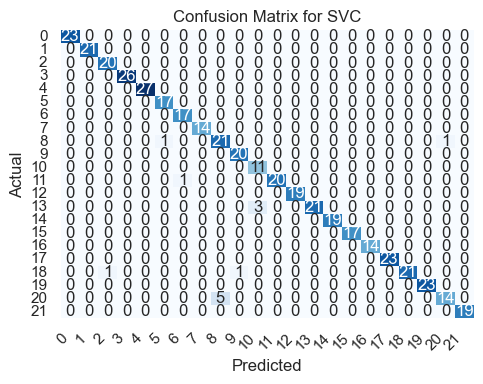

Evaluating K-Nearest Neighbors...


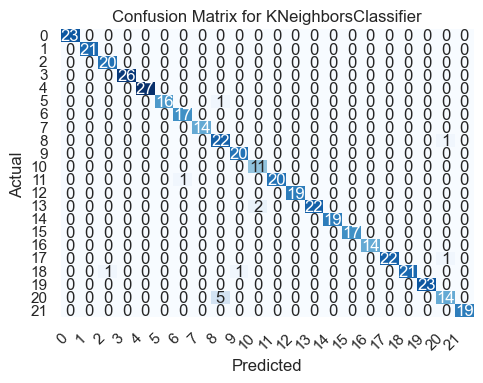

Evaluating Decision Tree...


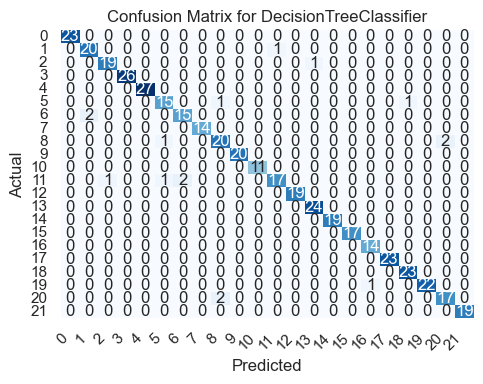

Evaluating Random Forest...


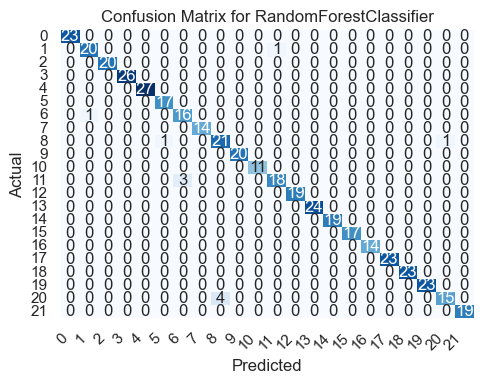

Evaluating Gradient Boosting...


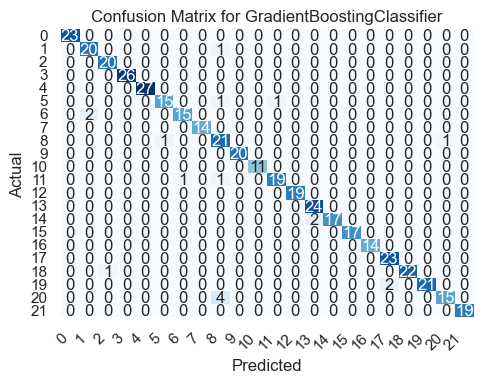

In [46]:
results = []
for name, model in models.items():
    print(f"Evaluating {name}...")
    result = train_evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append(result)

Results

In [47]:
results_df = pd.DataFrame(results)
results_df

Model  Accuracy       MSE  R-Squared  Precision  \
0                         SVC  0.970455  2.868182   0.932233   0.973090   
1        KNeighborsClassifier  0.970455  2.868182   0.932233   0.973079   
2      DecisionTreeClassifier  0.963636  2.750000   0.935025   0.963801   
3      RandomForestClassifier  0.975000  2.111364   0.950114   0.975906   
4  GradientBoostingClassifier  0.959091  2.665909   0.937012   0.962136   

     Recall  F1-Score  
0  0.970455  0.970311  
1  0.970455  0.970540  
2  0.963636  0.963340  
3  0.975000  0.974855  
4  0.959091  0.959355

Plot accuracies of all the models

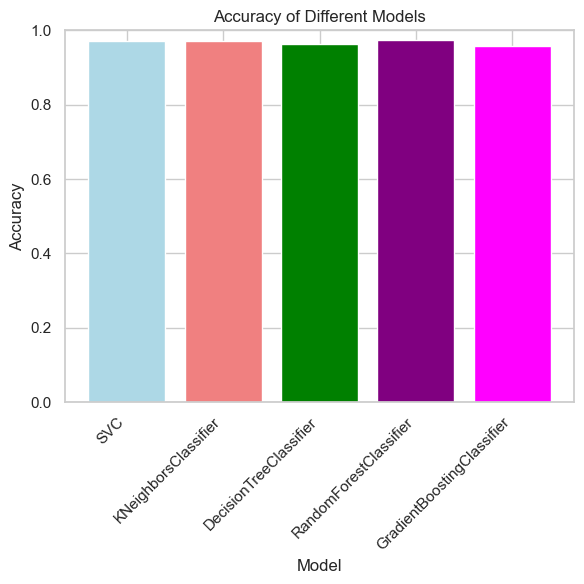

In [48]:
plt.figure(figsize=(6, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color = ['lightblue', 'lightcoral', 'green', 'purple', 'magenta'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


# PREDICTION

Among the models Random Forest is having more accuracy, hence that can be used for prediction

In [51]:
!pip install scikit-learn==1.5.2 

^C


Defaulting to user installation because normal site-packages is not writeable


In [50]:
import sys
print("Python path:", sys.executable)

import sklearn
print("Scikit-learn version:", sklearn.__version__)


Python path: c:\ProgramData\anaconda3\python.exe
Scikit-learn version: 1.5.2


In [52]:
from sklearn.ensemble import RandomForestClassifier
print("Scikit-learn version:", sklearn.__version__)
model_rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)
model_rf.fit(x_train, y_train)

Scikit-learn version: 1.5.2


RandomForestClassifier()

**RECOMMENDED CROP**

1) Define the mapping of numerical labels to crop names
2) Decode the predicted crop

In [59]:
def predict_crop():
    N = float(input("Enter the value of N: "))
    P = float(input("Enter the value of P: "))
    K = float(input("Enter the value of K: "))
    temperature = float(input("Enter temperature (in Celsius): "))
    humidity = float(input("Enter humidity (in percentage): "))
    ph = float(input("Enter pH value: "))
    rainfall = float(input("Enter rainfall (in mm): "))

    input_data = [[N, P, K, temperature, humidity, ph]]
    predicted_crop = model_rf.predict(input_data)[0]
    
    crop_mapping = {
        0: 'rice',
        1: 'maize',
        2: 'chickpea',
        3: 'kidneybeans',
        4: 'pigeonpeas',
        5: 'mothbeans',
        6: 'mungbean',
        7: 'blackgram',
        8: 'lentil',
        9: 'pomegranate',
        10: 'banana',
        11: 'mango',
        12: 'grapes',
        13: 'watermelon',
        14: 'muskmelon',
        15: 'apple',
        16: 'orange',
        17: 'papaya',
        18: 'coconut',
        19: 'cotton',
        20: 'jute',
        21: 'coffee'
    }


    predicted_crop_name = crop_mapping[predicted_crop]
    print("Based on the provided data, the recommended crop is:", predicted_crop_name)

predict_crop()

Based on the provided data, the recommended crop is: rice


In [60]:
import pickle
import os

# pickle.dump(minmax_scaler, open('minmaxscaler.pkl', 'wb'))
# pickle.dump(standard_scaler, open('standscaler.pkl', 'wb'))
# pickle.dump(model_rf, open('model_rf.pkl', 'wb'))
MODELS_DIR = '../app/models/'
pickle.dump(minmax_scaler, open(os.path.join(MODELS_DIR, 'minmaxscaler.pkl'), 'wb'))
pickle.dump(standard_scaler, open(os.path.join(MODELS_DIR, 'standscaler.pkl'), 'wb'))
pickle.dump(model_rf, open(os.path.join(MODELS_DIR, 'model_rf.pkl'), 'wb'))